<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/analysis/cases_rising_and_behavior_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we want to investigate whether people's stay at home behavior increase starts once the shelter in place order was issued, or do people stay at home even before states/counties force them to? \\
We do so by looking at the stay at home % time series against the number of cases time series. The conjecture here is that maybe people's stay at home behavior changes when number of cases in their county rises, not after government issued stay at home order.

# 1. Investigation of data from King County, Seattle

In [1]:
cd drive/My\ Drive/week4

/content/drive/My Drive/week4


In [ ]:
ls

agg_social_dist  number_of_cases_and_behavior.ipynb  us-counties.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load # covid cases data
df_cases = pd.read_csv("us-counties.csv")

In [ ]:

df_cases.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


cases column in the above table = cumulative cases, not daily new cases.

In [4]:
# load data about time series of % stay at home devices in each county
data = pd.read_csv("agg_social_dist")

In [5]:
data['home_device_percentage'] = data['completely_home_device_count'] / data['device_count']
data['part_time_work_device_percentage'] = data['part_time_work_behavior_devices'] / data['device_count']
data['full_time_work_device_percentage'] = data['full_time_work_behavior_devices'] / data['device_count']
data['delivery_device_percentage'] = data['delivery_behavior_devices'] / data['device_count']

there are 3000+ counties, decide to investigate just some counties. 
*   King County from Washington
*   LA County from California
*   New York City



In [ ]:
king_county_data = data[data['cnamelong'] == 'King County']

In [ ]:
king_county_data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
2574,2574,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,53.0,WA,King County,53033,-21.0,-82.0,0.0,102886,35676,3505,11833,0.0,712.016368,NaN,NaN,10456.752221,0.346753,0.034067,0.115011,0.0
5191,5191,2020-01-02T00:00:00-08:00,2020-01-03T00:00:00-08:00,53.0,WA,King County,53033,-20.0,-81.0,0.0,96096,26810,7880,15694,0.0,693.532894,NaN,NaN,10464.116696,0.278992,0.082001,0.163316,0.0
7808,7808,2020-01-03T00:00:00-08:00,2020-01-04T00:00:00-08:00,53.0,WA,King County,53033,-19.0,-80.0,0.0,97956,25503,8397,15555,0.0,723.099657,NaN,NaN,9787.402262,0.260352,0.085722,0.158796,0.0
10426,10426,2020-01-04T00:00:00-08:00,2020-01-05T00:00:00-08:00,53.0,WA,King County,53033,-18.0,-79.0,0.0,96053,27864,4825,12293,0.0,782.123109,NaN,NaN,8678.837350,0.290090,0.050233,0.127981,0.0
13044,13044,2020-01-05T00:00:00-08:00,2020-01-06T00:00:00-08:00,53.0,WA,King County,53033,-17.0,-78.0,0.0,97834,34246,4696,10023,0.0,718.573482,NaN,NaN,6926.459513,0.350042,0.048000,0.102449,0.0


In [ ]:
days_from_first_case_to_shelter = king_county_data.iloc[0]['days_since_first_case'] - king_county_data.iloc[0]['days_since_shelter']

In [ ]:
king_cases = df_cases[df_cases['county'] == 'King']

In [ ]:
king_cases.head()

,date,county,state,fips,cases,deaths
372,2020-02-28,King,Washington,53033.0,1,0
394,2020-02-29,King,Washington,53033.0,4,1
421,2020-03-01,King,Washington,53033.0,11,3
453,2020-03-02,King,Washington,53033.0,15,6
488,2020-03-03,King,Washington,53033.0,22,10


In [ ]:
print(king_cases.iloc[0,0])
print(type(king_cases.iloc[0,0]))

2020-02-28
<class 'str'>


In [ ]:
# convert date column king_cases dataframe from a string
# to a python date object.
from datetime import datetime
king_cases['date'] = king_cases['date'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
king_cases.head()

,date,county,state,fips,cases,deaths
372,2020-02-28,King,Washington,53033.0,1,0
394,2020-02-29,King,Washington,53033.0,4,1
421,2020-03-01,King,Washington,53033.0,11,3
453,2020-03-02,King,Washington,53033.0,15,6
488,2020-03-03,King,Washington,53033.0,22,10


date looks the same but they are date objects now

In [ ]:
print(king_cases.iloc[0,0])
print(type(king_cases.iloc[0,0]))

2020-02-28 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


let's do the same for social distancing data.

In [ ]:
king_county_data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
2574,2574,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,53.0,WA,King County,53033,-21.0,-82.0,0.0,102886,35676,3505,11833,0.0,712.016368,NaN,NaN,10456.752221,0.346753,0.034067,0.115011,0.0
5191,5191,2020-01-02T00:00:00-08:00,2020-01-03T00:00:00-08:00,53.0,WA,King County,53033,-20.0,-81.0,0.0,96096,26810,7880,15694,0.0,693.532894,NaN,NaN,10464.116696,0.278992,0.082001,0.163316,0.0
7808,7808,2020-01-03T00:00:00-08:00,2020-01-04T00:00:00-08:00,53.0,WA,King County,53033,-19.0,-80.0,0.0,97956,25503,8397,15555,0.0,723.099657,NaN,NaN,9787.402262,0.260352,0.085722,0.158796,0.0
10426,10426,2020-01-04T00:00:00-08:00,2020-01-05T00:00:00-08:00,53.0,WA,King County,53033,-18.0,-79.0,0.0,96053,27864,4825,12293,0.0,782.123109,NaN,NaN,8678.837350,0.290090,0.050233,0.127981,0.0
13044,13044,2020-01-05T00:00:00-08:00,2020-01-06T00:00:00-08:00,53.0,WA,King County,53033,-17.0,-78.0,0.0,97834,34246,4696,10023,0.0,718.573482,NaN,NaN,6926.459513,0.350042,0.048000,0.102449,0.0


In [ ]:
king_county_data['date'] = king_county_data['date_range_start'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
king_county_data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage,date
2574,2574,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,53.0,WA,King County,53033,-21.0,-82.0,0.0,102886,35676,3505,11833,0.0,712.016368,NaN,NaN,10456.752221,0.346753,0.034067,0.115011,0.0,2020-01-01
5191,5191,2020-01-02T00:00:00-08:00,2020-01-03T00:00:00-08:00,53.0,WA,King County,53033,-20.0,-81.0,0.0,96096,26810,7880,15694,0.0,693.532894,NaN,NaN,10464.116696,0.278992,0.082001,0.163316,0.0,2020-01-02
7808,7808,2020-01-03T00:00:00-08:00,2020-01-04T00:00:00-08:00,53.0,WA,King County,53033,-19.0,-80.0,0.0,97956,25503,8397,15555,0.0,723.099657,NaN,NaN,9787.402262,0.260352,0.085722,0.158796,0.0,2020-01-03
10426,10426,2020-01-04T00:00:00-08:00,2020-01-05T00:00:00-08:00,53.0,WA,King County,53033,-18.0,-79.0,0.0,96053,27864,4825,12293,0.0,782.123109,NaN,NaN,8678.837350,0.290090,0.050233,0.127981,0.0,2020-01-04
13044,13044,2020-01-05T00:00:00-08:00,2020-01-06T00:00:00-08:00,53.0,WA,King County,53033,-17.0,-78.0,0.0,97834,34246,4696,10023,0.0,718.573482,NaN,NaN,6926.459513,0.350042,0.048000,0.102449,0.0,2020-01-05


In [ ]:
# only select the variables we want to study, drop the others.
king_county_data = \
king_county_data[['date','county_code','days_since_first_case','days_since_shelter',\
                  'home_device_percentage', 'part_time_work_device_percentage',\
                  'full_time_work_device_percentage']]

In [ ]:
# want to merge on county code, but king_county_data has int
# and king_cases has float on county code. Convert
# cases's fips to int so we can merge them
king_cases['fips'] = king_cases['fips'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
king_cases.head()

,date,county,state,fips,cases,deaths
372,2020-02-28,King,Washington,53033,1,0
394,2020-02-29,King,Washington,53033,4,1
421,2020-03-01,King,Washington,53033,11,3
453,2020-03-02,King,Washington,53033,15,6
488,2020-03-03,King,Washington,53033,22,10


In [ ]:
king_county_data.head()

,date,county_code,days_since_first_case,days_since_shelter,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage
2574,2020-01-01,53033,-21.0,-82.0,0.346753,0.034067,0.115011
5191,2020-01-02,53033,-20.0,-81.0,0.278992,0.082001,0.163316
7808,2020-01-03,53033,-19.0,-80.0,0.260352,0.085722,0.158796
10426,2020-01-04,53033,-18.0,-79.0,0.290090,0.050233,0.127981
13044,2020-01-05,53033,-17.0,-78.0,0.350042,0.048000,0.102449


In [ ]:
print(king_county_data.shape);
print(king_cases.shape)

(127, 7)
(76, 6)


As we can see from above cases data start from 02-28 and % stay at home starts from 01-01, so when we join, we want to preserve the % stay at home data, even if there is no cases data to pair it with.

In [ ]:
# merged_data has both # cases in king county and completely at home % data
merged_data = king_county_data.merge(king_cases, left_on=['date','county_code'],\
                                     right_on = ['date', 'fips'], how = 'left')

In [ ]:
merged_data.shape

(127, 12)

In [ ]:
merged_data.head()

,date,county_code,days_since_first_case,days_since_shelter,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,county,state,fips,cases,deaths
0,2020-01-01,53033,-21.0,-82.0,0.346753,0.034067,0.115011,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,53033,-20.0,-81.0,0.278992,0.082001,0.163316,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,53033,-19.0,-80.0,0.260352,0.085722,0.158796,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,53033,-18.0,-79.0,0.290090,0.050233,0.127981,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,53033,-17.0,-78.0,0.350042,0.048000,0.102449,NaN,NaN,NaN,NaN,NaN


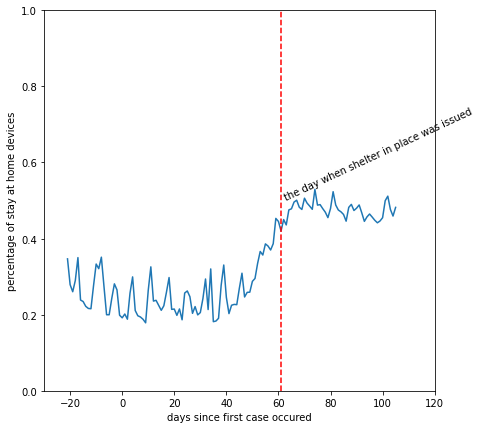

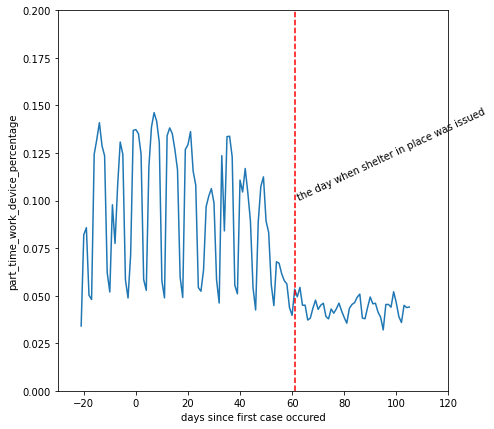

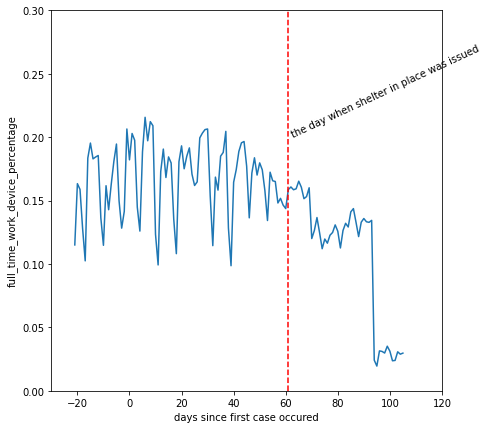

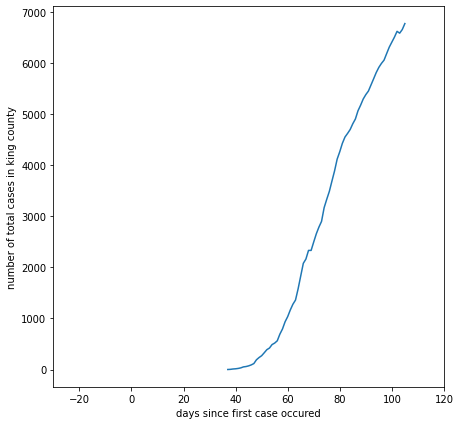

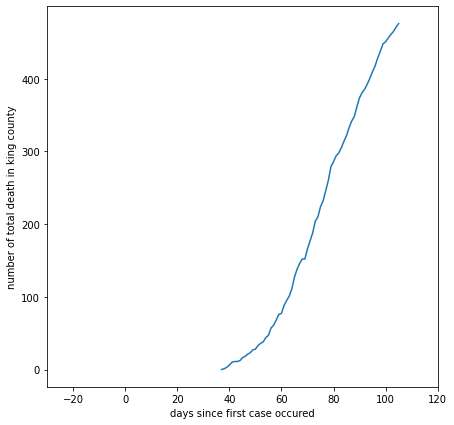

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(merged_data['days_since_first_case'], merged_data['home_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("percentage of stay at home devices")
plt.ylim(0,1)
plt.xlim(-30,120)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.5,'the day when shelter in place was issued',rotation=25)

plt.figure(figsize=(7,7))
plt.plot(merged_data['days_since_first_case'], merged_data['part_time_work_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("part_time_work_device_percentage")
plt.ylim(0,0.2)
plt.xlim(-30,120)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.1,'the day when shelter in place was issued',rotation=25)
plt.show()

plt.figure(figsize=(7,7))
plt.plot(merged_data['days_since_first_case'], merged_data['full_time_work_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("full_time_work_device_percentage")
plt.ylim(0,0.3)
plt.xlim(-30,120)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.2,'the day when shelter in place was issued',rotation=25)
plt.show()

plt.figure(figsize=(7,7))
plt.xlim(-30,120)
plt.plot(merged_data['days_since_first_case'],merged_data['cases'])
plt.xlabel("days since first case occured")
plt.ylabel("number of total cases in king county")
plt.show()

plt.figure(figsize=(7,7))
plt.xlim(-30,120)
plt.plot(merged_data['days_since_first_case'],merged_data['deaths'])
plt.xlabel("days since first case occured")
plt.ylabel("number of total death in king county")
plt.show()

from days 0 to days 40 king county has 1 case, so we didn't graph it on the second graph.. 

Interestingly when the cases and deaths starts to go up is exactly when people's behavior metrics like % stay at home change dramatically in king county, from day 40 to day 60, even before the government issued stay at home order.

Seems like at least in King county, number of cases has more influence on people's behavior than government's order

# 2. investigation of data from LA County, CA

In [ ]:
LA_data = data[(data['state_code'] == "CA") & (data['cnamelong'] == 'Los Angeles County')]

In [ ]:
days_from_first_case_to_shelter = LA_data.iloc[0]['days_since_first_case'] - LA_data.iloc[0]['days_since_shelter']

In [ ]:
LA_data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
2464,2464,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-25.0,-78.0,0.0,402115,135643,15733,43348,0.0,705.720413,NaN,NaN,12042.490755,0.337324,0.039126,0.107800,0.0
5081,5081,2020-01-02T00:00:00-08:00,2020-01-03T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-24.0,-77.0,0.0,393125,105785,30552,56610,0.0,653.484034,NaN,NaN,9744.824781,0.269087,0.077716,0.144000,0.0
7698,7698,2020-01-03T00:00:00-08:00,2020-01-04T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-23.0,-76.0,0.0,392810,102133,33061,58467,0.0,655.288020,NaN,NaN,9470.001102,0.260006,0.084165,0.148843,0.0
10316,10316,2020-01-04T00:00:00-08:00,2020-01-05T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-22.0,-75.0,0.0,386520,108305,24110,50115,0.0,703.270061,NaN,NaN,8948.600877,0.280205,0.062377,0.129657,0.0
12934,12934,2020-01-05T00:00:00-08:00,2020-01-06T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-21.0,-74.0,0.0,390481,121502,20516,39896,0.0,689.561164,NaN,NaN,7867.854933,0.311160,0.052540,0.102171,0.0


LA has fips code of 6037.

In [ ]:
LA_cases = df_cases[df_cases['fips'] ==  6037]

In [ ]:
LA_cases

,date,county,state,fips,cases,deaths
9,2020-01-26,Los Angeles,California,6037.0,1,0
14,2020-01-27,Los Angeles,California,6037.0,1,0
19,2020-01-28,Los Angeles,California,6037.0,1,0
24,2020-01-29,Los Angeles,California,6037.0,1,0
29,2020-01-30,Los Angeles,California,6037.0,1,0
...,...,...,...,...,...,...
127022,2020-05-09,Los Angeles,California,6037.0,31197,1512
129934,2020-05-10,Los Angeles,California,6037.0,31677,1530
132846,2020-05-11,Los Angeles,California,6037.0,32258,1569
135757,2020-05-12,Los Angeles,California,6037.0,33180,1613


In [ ]:
# convert date column dataframe from a string
# to a python date object.
LA_cases['date'] = LA_cases['date'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))
LA_data['date'] = LA_data['date_range_start'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# only select the variables we want to study, drop the others.
LA_data = \
LA_data[['date','county_code','days_since_first_case','days_since_shelter',\
         'home_device_percentage', 'part_time_work_device_percentage',\
         'full_time_work_device_percentage']]

In [ ]:
# want to merge on county code, but king_county_data has int
# and king_cases has float on county code. Convert
# cases's fips to int so we can merge them
LA_cases['fips'] = LA_cases['fips'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
LA_cases.head()

,date,county,state,fips,cases,deaths
9,2020-01-26,Los Angeles,California,6037,1,0
14,2020-01-27,Los Angeles,California,6037,1,0
19,2020-01-28,Los Angeles,California,6037,1,0
24,2020-01-29,Los Angeles,California,6037,1,0
29,2020-01-30,Los Angeles,California,6037,1,0


In [ ]:
LA_data.head()

,date,county_code,days_since_first_case,days_since_shelter,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage
2464,2020-01-01,6037,-25.0,-78.0,0.337324,0.039126,0.107800
5081,2020-01-02,6037,-24.0,-77.0,0.269087,0.077716,0.144000
7698,2020-01-03,6037,-23.0,-76.0,0.260006,0.084165,0.148843
10316,2020-01-04,6037,-22.0,-75.0,0.280205,0.062377,0.129657
12934,2020-01-05,6037,-21.0,-74.0,0.311160,0.052540,0.102171


In [ ]:
# merged_data has both # cases in LA county and completely at home % data
merged_data = LA_data.merge(LA_cases, left_on=['date','county_code'],\
                            right_on = ['date', 'fips'], how = 'left')

In [ ]:
merged_data.shape

(127, 12)

In [ ]:
merged_data.head()

,date,county_code,days_since_first_case,days_since_shelter,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,county,state,fips,cases,deaths
0,2020-01-01,6037,-25.0,-78.0,0.337324,0.039126,0.107800,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,6037,-24.0,-77.0,0.269087,0.077716,0.144000,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,6037,-23.0,-76.0,0.260006,0.084165,0.148843,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,6037,-22.0,-75.0,0.280205,0.062377,0.129657,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,6037,-21.0,-74.0,0.311160,0.052540,0.102171,NaN,NaN,NaN,NaN,NaN


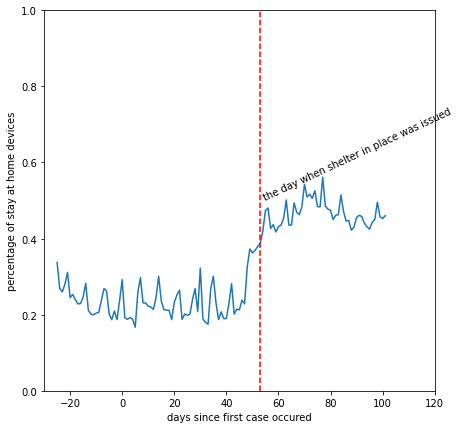

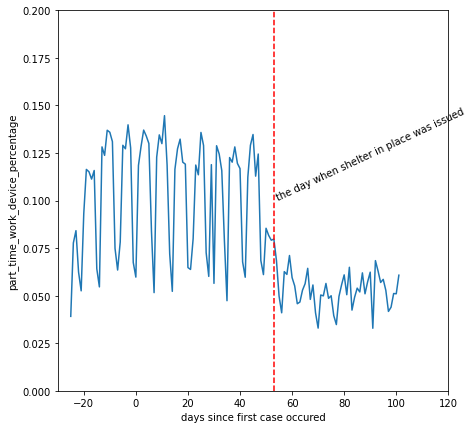

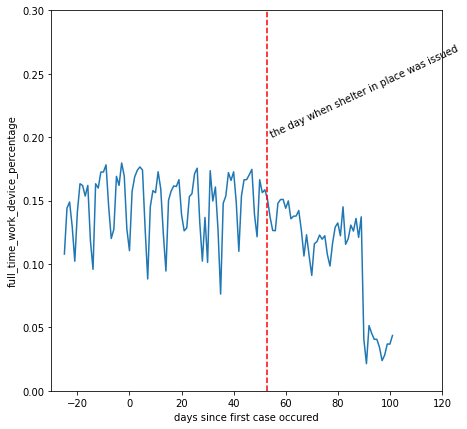

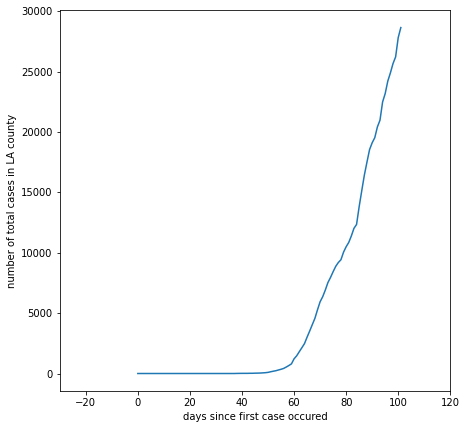

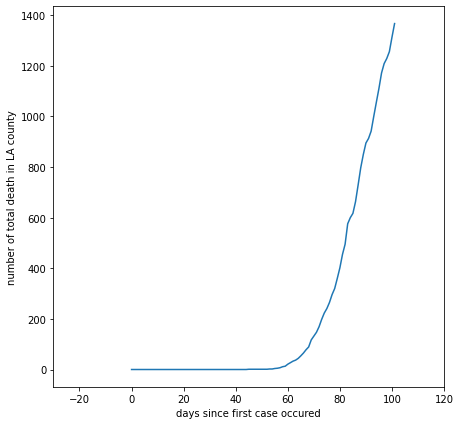

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(merged_data['days_since_first_case'], merged_data['home_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("percentage of stay at home devices")
plt.ylim(0,1)
plt.xlim(-30,120)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.5,'the day when shelter in place was issued',rotation=25)

plt.figure(figsize=(7,7))
plt.plot(merged_data['days_since_first_case'], merged_data['part_time_work_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("part_time_work_device_percentage")
plt.ylim(0,0.2)
plt.xlim(-30,120)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.1,'the day when shelter in place was issued',rotation=25)
plt.show()

plt.figure(figsize=(7,7))
plt.plot(merged_data['days_since_first_case'], merged_data['full_time_work_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("full_time_work_device_percentage")
plt.ylim(0,0.3)
plt.xlim(-30,120)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.2,'the day when shelter in place was issued',rotation=25)
plt.show()

plt.figure(figsize=(7,7))
plt.xlim(-30,120)
plt.plot(merged_data['days_since_first_case'],merged_data['cases'])
plt.xlabel("days since first case occured")
plt.ylabel("number of total cases in LA county")
plt.show()

plt.figure(figsize=(7,7))
plt.xlim(-30,120)
plt.plot(merged_data['days_since_first_case'],merged_data['deaths'])
plt.xlabel("days since first case occured")
plt.ylabel("number of total death in LA county")
plt.show()

We can see that % of stay at home changes dramatically about 5 days before the shelter in place order from government, but # cases didn't rise that much (a little bit) from day 45 to 50. Seems like LA county people is more precautious than King county people -- **they start to stay at home even before the cases start to rise.** Maybe this is because other parts of the country has a lot of cases, so people in LA becomes precautious even when LA doesn't have a lot of cases yet. 

# 3. Investigation of data from New York City.

In [ ]:
data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home
0,0,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Aroostook County,23003,-93.0,-91.0,0.0,56,20,5,7,0.0,477.000000,NaN,NaN,22780.000000
1,1,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Washington County,23029,-93.0,-91.0,0.0,156,68,5,24,0.0,280.461538,NaN,NaN,89197.250000
2,2,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Adjuntas Municipio,72001,-75.0,-74.0,0.0,241,115,14,19,0.0,890.377593,NaN,NaN,140597.925311
3,3,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguada Municipio,72003,-75.0,-74.0,0.0,697,327,40,59,0.0,775.674319,NaN,NaN,60138.741750
4,4,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguadilla Municipio,72005,-75.0,-74.0,0.0,1103,518,55,98,0.0,740.937443,NaN,NaN,8579.466002


In [8]:
# 36061 is county code of a New York City region
# New York City has very complicated region codes...
NY_data = data[data['county_code'] == 36061]

In [9]:
days_from_first_case_to_shelter = NY_data.iloc[0]['days_since_first_case'] - LA_data.iloc[0]['days_since_shelter']

In [10]:
NY_data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
664,664,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,36.0,NY,New York County,36061,-61.0,-81.0,0.0,58983,19650,2597,7140,0.0,494.304155,NaN,NaN,18274.778835,0.333147,0.044030,0.121052,0.0
3279,3279,2020-01-02T00:00:00-05:00,2020-01-03T00:00:00-05:00,36.0,NY,New York County,36061,-60.0,-80.0,0.0,57134,15304,5538,10385,0.0,480.543214,NaN,NaN,11335.163895,0.267862,0.096930,0.181766,0.0
5897,5897,2020-01-03T00:00:00-05:00,2020-01-04T00:00:00-05:00,36.0,NY,New York County,36061,-59.0,-79.0,0.0,57942,15540,5713,10213,0.0,481.440906,NaN,NaN,9623.461289,0.268199,0.098599,0.176262,0.0
8514,8514,2020-01-04T00:00:00-05:00,2020-01-05T00:00:00-05:00,36.0,NY,New York County,36061,-58.0,-78.0,0.0,57070,17898,3310,7625,0.0,508.651498,NaN,NaN,10219.951779,0.313615,0.057999,0.133608,0.0
11131,11131,2020-01-05T00:00:00-05:00,2020-01-06T00:00:00-05:00,36.0,NY,New York County,36061,-57.0,-77.0,0.0,57637,20871,3281,6779,0.0,559.901157,NaN,NaN,9592.001301,0.362111,0.056925,0.117615,0.0


In [11]:
NY_cases = df_cases[df_cases['county'] == 'New York City']

In [12]:
df_cases[df_cases['county'] == 'New York City']

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
565,2020-03-05,New York City,New York,NaN,4,0
...,...,...,...,...,...,...
128552,2020-05-09,New York City,New York,NaN,188663,19324
131463,2020-05-10,New York City,New York,NaN,189656,19436
134375,2020-05-11,New York City,New York,NaN,190546,19563
137288,2020-05-12,New York City,New York,NaN,191320,19736


New York City doesn't have FIPS (county code) in this cases dataset....

In [13]:
NY_cases

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
565,2020-03-05,New York City,New York,NaN,4,0
...,...,...,...,...,...,...
128552,2020-05-09,New York City,New York,NaN,188663,19324
131463,2020-05-10,New York City,New York,NaN,189656,19436
134375,2020-05-11,New York City,New York,NaN,190546,19563
137288,2020-05-12,New York City,New York,NaN,191320,19736


In [14]:
from datetime import datetime
# convert date column dataframe from a string
# to a python date object.
NY_cases['date'] = NY_cases['date'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))
NY_data['date'] = NY_data['date_range_start'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
# only select the variables we want to study, drop the others.
NY_data = \
NY_data[['date','county_code','days_since_first_case','days_since_shelter',\
         'home_device_percentage', 'part_time_work_device_percentage',\
         'full_time_work_device_percentage']]

In [16]:
NY_cases

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
565,2020-03-05,New York City,New York,NaN,4,0
...,...,...,...,...,...,...
128552,2020-05-09,New York City,New York,NaN,188663,19324
131463,2020-05-10,New York City,New York,NaN,189656,19436
134375,2020-05-11,New York City,New York,NaN,190546,19563
137288,2020-05-12,New York City,New York,NaN,191320,19736


In [20]:
NY_data.head()

,date,county_code,days_since_first_case,days_since_shelter,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage
664,2020-01-01,36061,-61.0,-81.0,0.333147,0.044030,0.121052
3279,2020-01-02,36061,-60.0,-80.0,0.267862,0.096930,0.181766
5897,2020-01-03,36061,-59.0,-79.0,0.268199,0.098599,0.176262
8514,2020-01-04,36061,-58.0,-78.0,0.313615,0.057999,0.133608
11131,2020-01-05,36061,-57.0,-77.0,0.362111,0.056925,0.117615


In [21]:
# merged_data has both # cases in New York City county and completely at home % data
merged_data = NY_data.merge(NY_cases, left_on=['date'],\
                            right_on = ['date'], how = 'left')

In [22]:
merged_data

,date,county_code,days_since_first_case,days_since_shelter,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,county,state,fips,cases,deaths
0,2020-01-01,36061,-61.0,-81.0,0.333147,0.044030,0.121052,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,36061,-60.0,-80.0,0.267862,0.096930,0.181766,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,36061,-59.0,-79.0,0.268199,0.098599,0.176262,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,36061,-58.0,-78.0,0.313615,0.057999,0.133608,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,36061,-57.0,-77.0,0.362111,0.056925,0.117615,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
122,2020-05-02,36061,61.0,41.0,0.471906,0.033996,0.029841,New York City,New York,NaN,177490.0,18021.0
123,2020-05-03,36061,62.0,42.0,0.517881,0.036835,0.033211,New York City,New York,NaN,179728.0,18451.0
124,2020-05-04,36061,63.0,43.0,0.535243,0.037878,0.032770,New York City,New York,NaN,181034.0,18580.0
125,2020-05-05,36061,64.0,44.0,0.538927,0.037213,0.034313,New York City,New York,NaN,182318.0,18719.0


In [23]:
merged_data.shape

(127, 12)

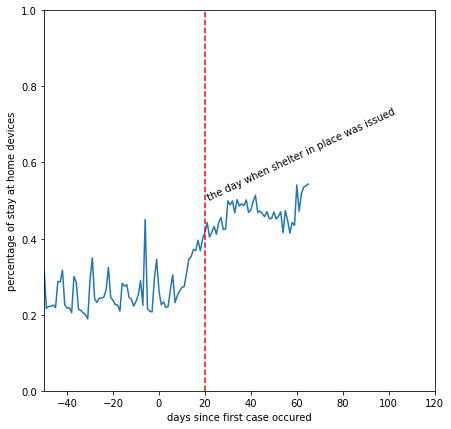

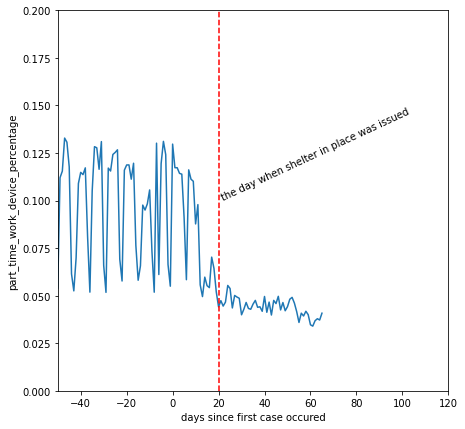

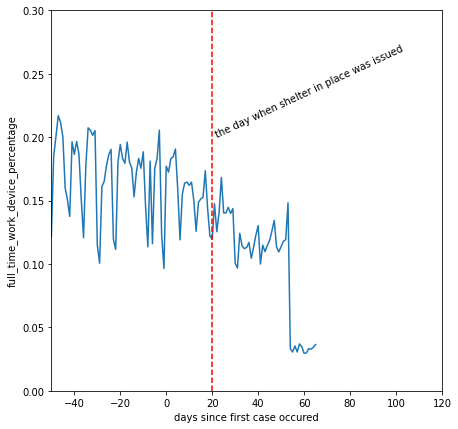

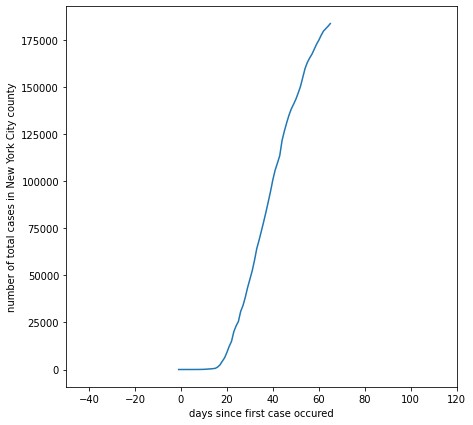

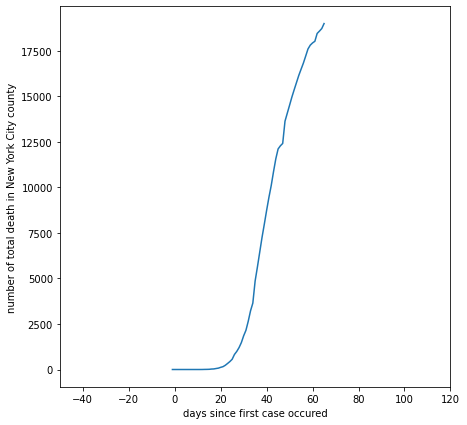

In [25]:
plt.figure(figsize=(7,7))
plt.plot(merged_data['days_since_first_case'], merged_data['home_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("percentage of stay at home devices")
plt.ylim(0,1)
plt.xlim(-50,120)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.5,'the day when shelter in place was issued',rotation=25)

plt.figure(figsize=(7,7))
plt.plot(merged_data['days_since_first_case'], merged_data['part_time_work_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("part_time_work_device_percentage")
plt.ylim(0,0.2)
plt.xlim(-50,120)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.1,'the day when shelter in place was issued',rotation=25)
plt.show()

plt.figure(figsize=(7,7))
plt.plot(merged_data['days_since_first_case'], merged_data['full_time_work_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("full_time_work_device_percentage")
plt.ylim(0,0.3)
plt.xlim(-50,120)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.2,'the day when shelter in place was issued',rotation=25)
plt.show()

plt.figure(figsize=(7,7))
plt.xlim(-50,120)
plt.plot(merged_data['days_since_first_case'],merged_data['cases'])
plt.xlabel("days since first case occured")
plt.ylabel("number of total cases in New York City county")
plt.show()

plt.figure(figsize=(7,7))
plt.xlim(-50,120)
plt.plot(merged_data['days_since_first_case'],merged_data['deaths'])
plt.xlabel("days since first case occured")
plt.ylabel("number of total death in New York City county")
plt.show()

We also see from New York City data that people's behavior change even before the stay at home order was issued. (day 0 - 20). Also the cases hasn't rised that much from day 0 to day 20. People are being cautious. 

# 4. Conclusion:
In general people's behavior changes 5 - 20 days prior to the stay at home order was issued in the state/county. In King County, Seattle, people's behavior changed as the number of cases in the county rose. In LA, New York City though, people's behavior changed even before cases started to rise. (probably being extra cautious because there are virus from all over the country)
